# Energy-Star-Score-prediction 
The objective is to use the energy data to build a model that can predict the Energy Star Score of a building and interpret the results to find the factors which influence the score.

In [1]:
##Libraries imports and Optimal parameter settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
import seaborn as sns
sns.set(font_scale=2)
#set default fontsize 
plt.rcParams['font.size'] = 20
#no warning about setting a value on copy of  slice
pd.options.mode.chained_assignment=None

In [2]:
Ess_df = pd.read_csv("Usecase1_Dataset.csv")
print('####################################################################################################################')
print('                                 Data Summary                                                                       ')
print('####################################################################################################################')
print(Ess_df.info())

#replace all occurences of not available with numpy Nan
Ess_df=Ess_df.replace({'Not Available':np.nan})


for col in list(Ess_df.columns):
    #select the coumns should be numeric
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        #convert the data type to float
        Ess_df[col]=Ess_df[col].astype(float)
print('####################################################################################################################')
print('                                 Data Statistics                                                                    ')
print('####################################################################################################################')
Ess_df.describe()

####################################################################################################################
                                 Data Summary                                                                       
####################################################################################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,...,Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,3741.000000,1484.000000,11746.000000,11746.000000,11746.000000,9642.000000,...,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,22778.682010,12016.825270,1948.738379,1.289971,98.762557,59.854594,...,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,55094.441422,27959.755486,30.576386,4.017484,7.501603,29.993586,...,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,0.000000,0.000000,1600.000000,0.000000,0.000000,1.000000,...,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,4000.000000,1720.750000,1927.000000,1.000000,100.000000,37.000000,...,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,8654.000000,5000.000000,1941.000000,1.000000,100.000000,65.000000,...,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,20000.000000,12000.000000,1966.000000,1.000000,100.000000,85.000000,...,4.249000e+02,1.584140e+05,8.031875e+03,70.805000,162.750000,40.817623,-73.932443,9.000000,33.000000,531.500000
max,14993.000000,5.991312e+06,1.354011e+07,1.421712e+07,962428.000000,591640.000000,2019.000000,161.000000,100.000000,100.000000,...,4.764375e+06,1.421712e+07,6.594604e+06,96305.690000,912801.100000,40.912869,-73.715543,56.000000,51.000000,155101.000000


In [3]:
# function to calculate missing values by column
def missing_values(df):
    mis_val=df.isnull().sum()
    mis_val_percent=100*df.isnull().sum()/len(df)
    mis_val_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mis_val_table_ren_columns=mis_val_table.rename(columns={0:'missing values',1:'% of total values'})
    mis_val_table_ren_columns=mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of total values',ascending=False).round(1)
    print('Data has ' + str(df.shape[1]) + " columns."
         'there are ' + str(mis_val_table_ren_columns.shape[0]) + ' columns has missing values')
    return mis_val_table_ren_columns
missing=missing_values(Ess_df)
print('####################################################################################################################')
print('                                Missing Values Percentages                                                                 ')
print('####################################################################################################################')
print(missing)
#get missing values > 50% missing
missing_columns=list(missing[missing['% of total values'] > 50].index)
print('we will remove %d columns.' %len(missing_columns))

Data has 60 columns.there are 46 columns has missing values
####################################################################################################################
                                Missing Values Percentages                                                                 
####################################################################################################################
                                                    missing values  \
Fuel Oil #1 Use (kBtu)                                       11737   
Diesel #2 Use (kBtu)                                         11730   
Address 2                                                    11539   
Fuel Oil #5 & 6 Use (kBtu)                                   11152   
District Steam Use (kBtu)                                    10810   
Fuel Oil #4 Use (kBtu)                                       10425   
3rd Largest Property Use Type - Gross Floor Are...           10262   
3rd Largest Property U

####################################################################################################################
                                  Energy Star Score Histogram                                                                 
####################################################################################################################


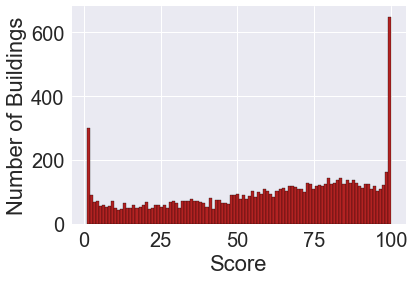

####################################################################################################################
                                 SITE EUI Distribution                                                                   
####################################################################################################################


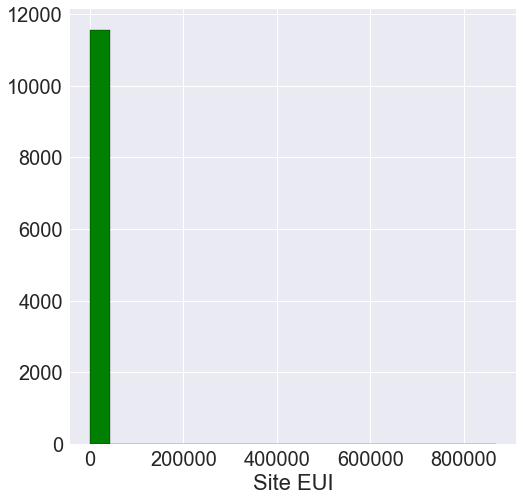

In [4]:
Ess_df = Ess_df.rename(columns = {'ENERGY STAR Score': 'score'})

print('####################################################################################################################')
print('                                  Energy Star Score Histogram                                                                 ')
print('####################################################################################################################')
plt.hist(Ess_df['score'].dropna(), bins = 100, edgecolor = 'k',color='firebrick');
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.show()
print('####################################################################################################################')
print('                                 SITE EUI Distribution                                                                   ')
print('####################################################################################################################')
figsize(8, 8)
plt.hist(Ess_df['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black',color='green');
plt.xlabel('Site EUI'); 
plt.show()

In [5]:
print(Ess_df['Site EUI (kBtu/ft²)'].describe())
print('####################################################################################################################')
print(Ess_df['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10))

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64
####################################################################################################################
3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64


# Outliers Removal
On the low end, an extreme outlier is below $\text{First Quartile} -3 * \text{Interquartile Range}$

On the high end, an extreme outlier is above $\text{Third Quartile} + 3 * \text{Interquartile Range}$

In this case, I will only remove the single outlying point and see how the distribution looks.

In [6]:
first_quartile = Ess_df['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = Ess_df['Site EUI (kBtu/ft²)'].describe()['75%']
iqr = third_quartile - first_quartile
# Remove outliers
Ess_df = Ess_df[(Ess_df['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (Ess_df['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

Text(0.5,1,'Density Plot of Energy Star Scores by Borough')

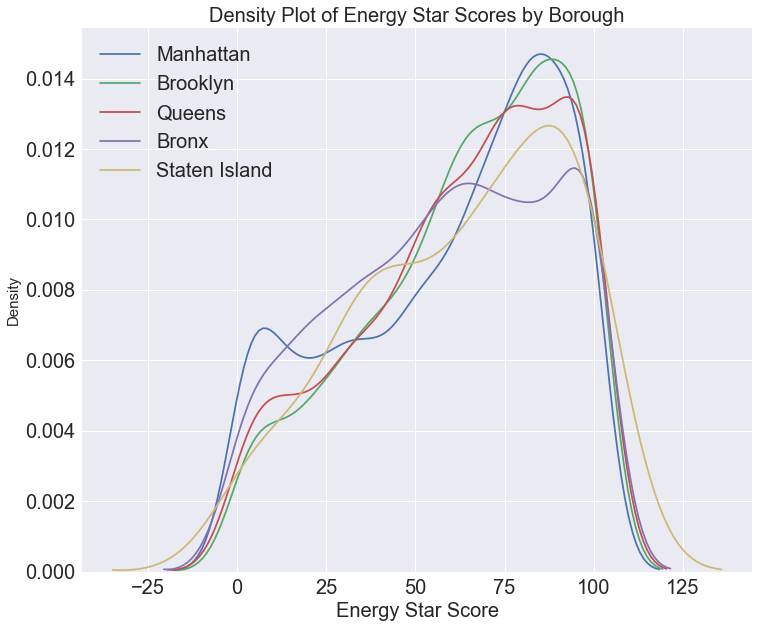

In [7]:
# Create a list of boroughs with more than 100 observations
boroughs = Ess_df.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)
figsize(12, 10)
for borough in boroughs:
    subset = Ess_df[Ess_df['Borough'] == borough]
    sns.kdeplot(subset['score'].dropna(),
               label = borough);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 15); 
plt.title('Density Plot of Energy Star Scores by Borough', size = 20)


The borough of the building does not seem to make as significant a difference in the distribution of the score as does the building type. Nonetheless, it might make sense to include the borough as a categorical variable.

# Corelation between feature & target¶
To quantify correlations between the features (variables) and the target, caculate Pearson correlation coefficient..
The code below calculates the correlation coefficients between all the variables and the score

In [8]:
correlations_data = Ess_df.corr()['score'].sort_values()
print('####################################################################################################################')
print('                                 Most negeative correlations                                                        ')
print('####################################################################################################################')
print(correlations_data.head(15), '\n')
print('####################################################################################################################')
print('                                 Most psitive correlations                                                          ')
print('####################################################################################################################')
print(correlations_data.tail(15))

####################################################################################################################
                                 Most negeative correlations                                                        
####################################################################################################################
Fuel Oil #1 Use (kBtu)                                       -0.890588
Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Fuel Oil #4 Use (kBtu)                                       -0.205467
Fuel Oil #5 & 6 Use (kBtu)                                   -0.189791
Direct GHG

In [13]:

# Select the numeric columns
numeric_subset = Ess_df.select_dtypes(include=['int64','float64'])
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

categorical_subset = Ess_df[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['score'])

# Find correlations with the score 
correlations = features.corr()['score'].dropna().sort_values()

C:\Users\shivr\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\Users\shivr\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
C:\Users\shivr\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


In [14]:
# Display most negative correlations
correlations.head(15)

sqrt_Fuel Oil #1 Use (kBtu)                     -0.905285
Fuel Oil #1 Use (kBtu)                          -0.890588
log_Fuel Oil #1 Use (kBtu)                      -0.885060
Site EUI (kBtu/ft²)                             -0.723864
Weather Normalized Site EUI (kBtu/ft²)          -0.713993
sqrt_Site EUI (kBtu/ft²)                        -0.699817
sqrt_Weather Normalized Site EUI (kBtu/ft²)     -0.689019
sqrt_Weather Normalized Source EUI (kBtu/ft²)   -0.671044
sqrt_Source EUI (kBtu/ft²)                      -0.669396
Weather Normalized Source EUI (kBtu/ft²)        -0.645542
Source EUI (kBtu/ft²)                           -0.641037
log_Source EUI (kBtu/ft²)                       -0.622892
log_Weather Normalized Source EUI (kBtu/ft²)    -0.620329
log_Site EUI (kBtu/ft²)                         -0.612039
log_Weather Normalized Site EUI (kBtu/ft²)      -0.601332
Name: score, dtype: float64

In [15]:
# Display most positive correlations
correlations.tail(15)

sqrt_Order                                                         0.028662
Borough_Queens                                                     0.029545
Largest Property Use Type_Supermarket/Grocery Store                0.030038
Largest Property Use Type_Residence Hall/Dormitory                 0.035407
Order                                                              0.036827
Largest Property Use Type_Hospital (General Medical & Surgical)    0.048410
Borough_Brooklyn                                                   0.050486
log_Community Board                                                0.055495
Community Board                                                    0.056612
sqrt_Community Board                                               0.058029
sqrt_Council District                                              0.060623
log_Council District                                               0.061101
Council District                                                   0.061639
Largest Prop


After transforming the features, the strongest relationships are still those related to Energy Use Intensity (EUI). The log and square root transformations do not seem the have resulted in any stronger relationships. There are no strong positive linear relationships although we do see that a building type of office (Largest Property Use Type_Office) is slightly positively correlated with the score. This variable is a one-hot encoded representation of the categorical variables for building type.

We can use these correlations in order to perform feature selection (coming up in a little bit). Right now, let's graph the most significant correlation (in terms of absolute value) in the dataset which is Site EUI (kBtu/ft^2). We can color the graph by the building type to show how that affects the relationship.

# Bivariate plots

In [18]:

# Create a list of buildings with more than 100 measurements
types = Ess_df.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

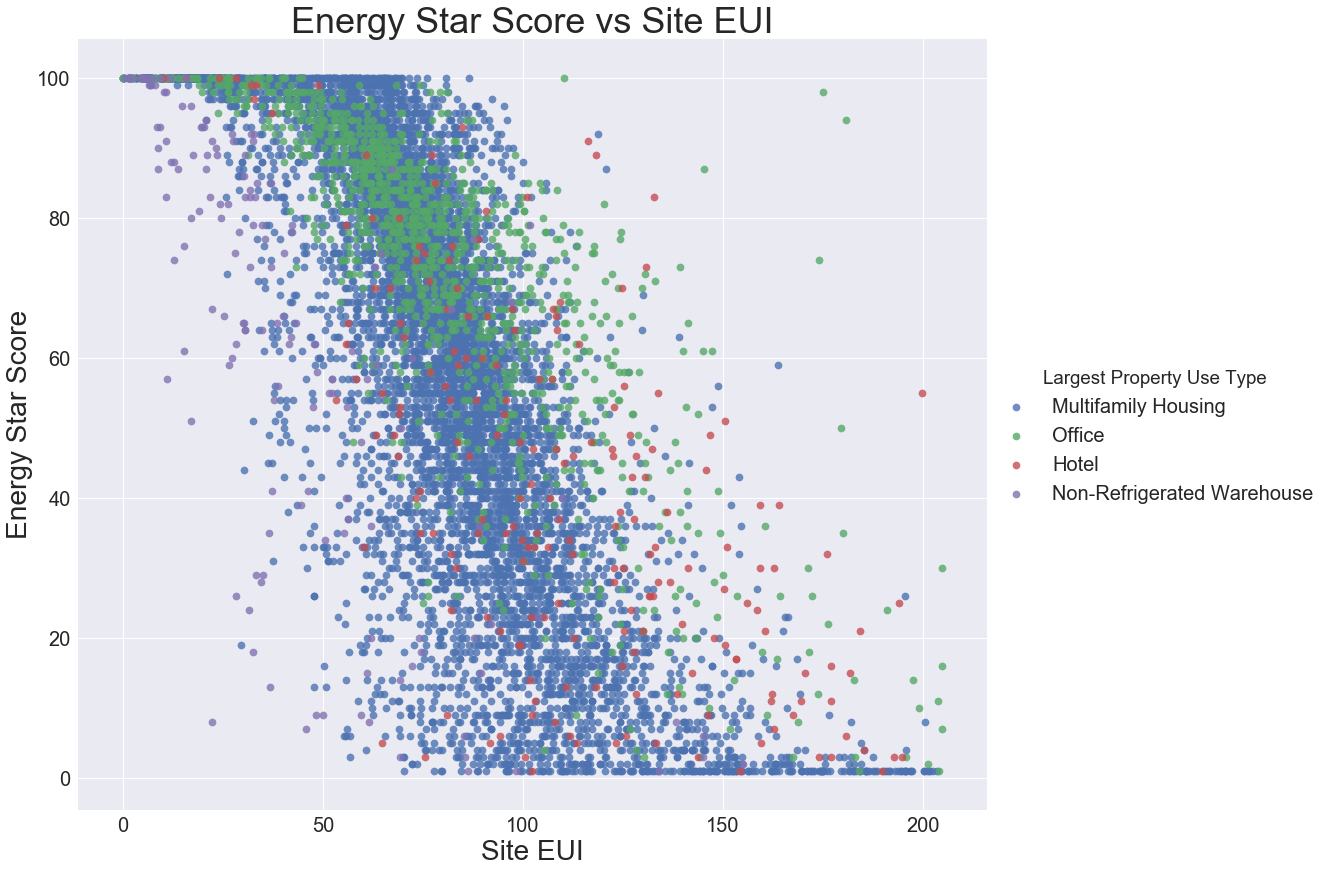

In [20]:

# Extract the building types
features['Largest Property Use Type'] = Ess_df.dropna(subset = ['score'])['Largest Property Use Type']

# Limit to building types with more than 100 observations (from previous code)
features = features[features['Largest Property Use Type'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('Site EUI (kBtu/ft²)', 'score', 
          hue = 'Largest Property Use Type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36);


There is a clear negative relationship between the Site EUI and the score. The relationship is not perfectly linear (it looks with a correlation coefficient of -0.7, but it does look like this feature will be important for predicting the score of a building.

# Pairs plot¶
As a final exercise for exploratory data analysis, we can make a pairs plot between several different variables. The Pairs Plot is a great way to examine many variables at once as it shows scatterplots between pairs of variables and histograms of single variables on the diagonal.

Using the seaborn PairGrid function, we can map different plots on to the three aspects of the grid. The upper triangle will have scatterplots, the diagonal will show histograms, and the lower triangle will show both the correlation coefficient between two variables and a 2-D kernel density estimate of the two variables.

C:\Users\shivr\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


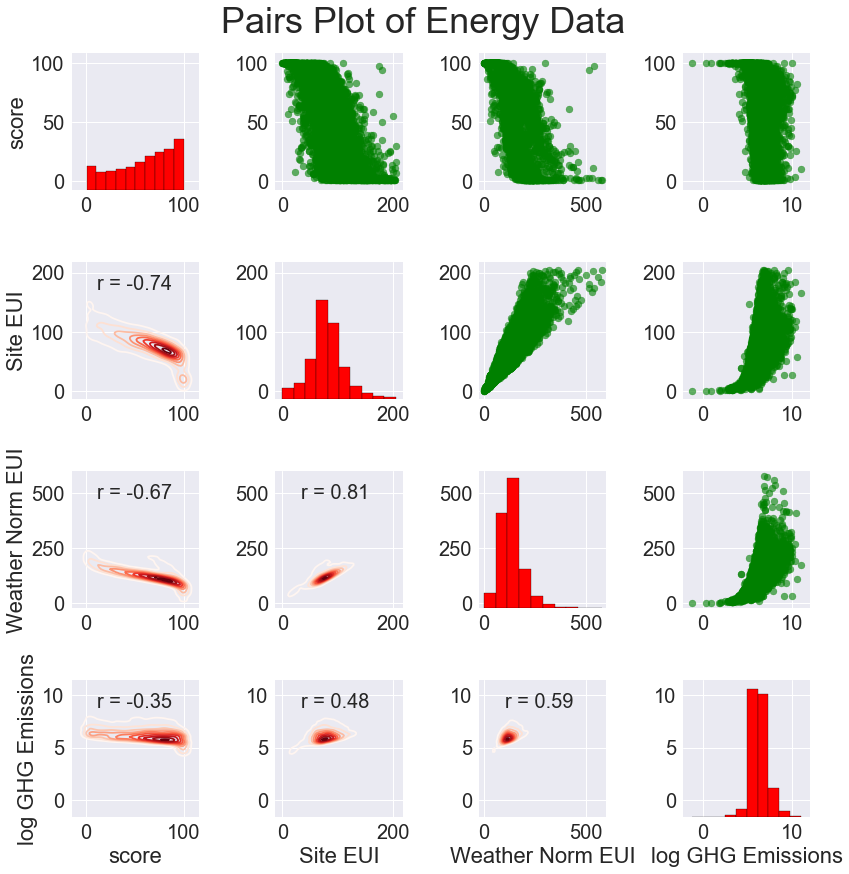

In [21]:

# Extract the columns to  plot
plot_data = features[['score', 'Site EUI (kBtu/ft²)', 
                      'Weather Normalized Source EUI (kBtu/ft²)', 
                      'log_Total GHG Emissions (Metric Tons CO2e)']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Rename columns 
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI', 
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'green', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);


To interpret the relationships in the plot, we can look for where the variables in one row intersect with the variables in one column. For example, to find the relationship between score and the log of GHG Emissions, we look at the score column and find the log GHG Emissions row. At the intersection (the lower left plot) we see that the score has a -0.35 correlation coefficient with this varible. If we look at the upper right plot, we can see a scatterplot of this relationship.

# Feature Engineering & Selection

Feature Selection: The process of choosing the most relevant features in your data. "Most relevant" can depend on many factors, but it might be something as simple as the highest correlation with the target, or the features with the most variance. In feature selection, we remove features that do not help our model learn the relationship between features and the target. This can help the model generalize better to new data and results in a more interpretable model. Generally, I think of feature selection as subtracting features so we are left with only those that are most important.

Feature engineering and selection are iterative processes that will usually require several attempts to get right. Often we will use the results of modeling, such as the feature importances from a random forest, to go back and redo feature selection, or we might later discover relationships that necessitate creating new variables. Moreover, these processes usually incorporate a mixture of domain knowledge and statistical qualitites of the data.

In [22]:
# Copy the original data
features = Ess_df.copy()

# Select the numeric columns
numeric_subset = Ess_df.select_dtypes(include=['int64','float64'])

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# Select the categorical columns
categorical_subset = Ess_df[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

C:\Users\shivr\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\Users\shivr\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


(11319, 126)

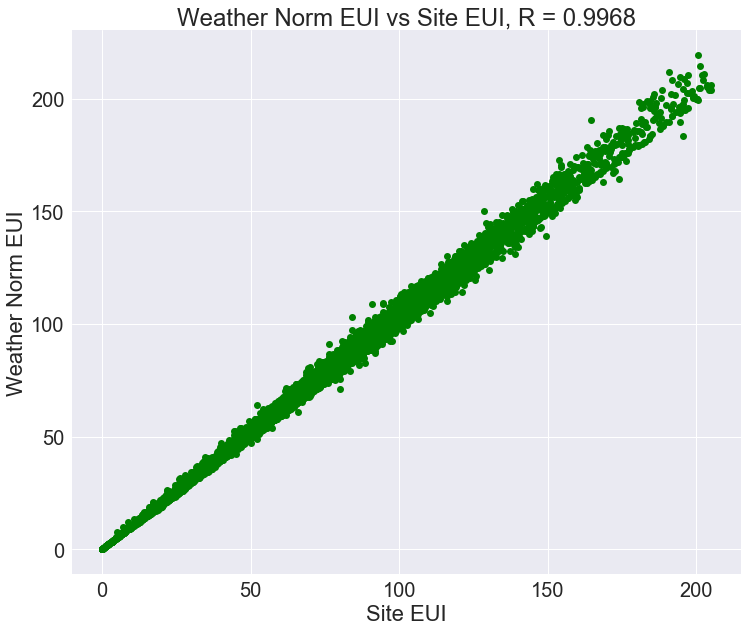

In [23]:
plot_data = Ess_df[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()
plt.plot(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'go')
plt.xlabel('Site EUI'); plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(Ess_df[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1]);


Removing collinear features is a method to reduce model complexity by decreasing the number of features and can help to increase model generalization. It can also help us to interpret the model because we only have to worry about a single variable, such as EUI, rather than how both EUI and weather normalized EUI affect the score.

There are a number of methods for removing collinear features, such as using the Variance Inflation Factor. We will use a simpler metric, and remove features that have a correlation coefficient above a certain threshold with each other (not with the score because we want variables that are highly correlated with the score!)

The following code removes the collinear features based on a threshold we select for the correlation coefficients by removing one of the two features that are compared. It also prints the correlations that it removes so we can see the effect of adjusting the threshold. We will use a threshold of 0.6 which removes one of a pair of features if the correlation coefficient between the features exceeds this value.

In [24]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['score']
    x = x.drop(['score'],axis=1)
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(drops,axis=1)
    x = x.drop(['Weather Normalized Site EUI (kBtu/ft²)', 
                          
                        
                          'Largest Property Use Type - Gross Floor Area (ft²)'],axis=1)
    
    # Add the score back in to the data
    x['score'] = y
               
    return x

In [25]:
# Remove the collinear features above a specified correlation coefficient
features = remove_collinear_features(features, 0.6);

C:\Users\shivr\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater_equal


In [26]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape

(11319, 66)


Our final dataset now has 64 features (one of the columns is the target). This is still quite a few, but mostly it is because we have one-hot encoded the categorical variables. Moreover, while a large number of features may be problematic for models such as linear regression, models such as the random forest perform implicit feature selection and automatically determine which features are important during traning. There are other feature selection steps to take, but for now we will keep all the features we have and see how the model performs.

In [27]:
# Extract the buildings with no score and the buildings with a score
no_score = features[features['score'].isnull()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(1858, 66)
(9461, 66)


In [28]:

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Separate out the features and targets
features = score.drop('score',axis=1)
targets = pd.DataFrame(score['score'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(6622, 65)
(2839, 65)
(6622, 1)
(2839, 1)


We have 1858 buildings with no score, 6622 buildings with a score in the training set, and 2839 buildings with a score in the testing set. We have one final step to take in this notebook: determining a naive baseline for our models to beat!

# Establish a Baseline
For a regression task, a good naive baseline is to predict the median value of the target on the training set for all examples on the test set. This is simple to implement and sets a relatively low bar for our models: if they cannot do better than guessing the medin value, then we will need to rethink our approach.

Metric : Mean Absolute Error
There are a number of metrics used in machine learning tasks and it can be difficult to know which one to choose. Most of the time it will depend on the particular problem and if you have a specific goal to optimize for. I like Andrew Ng's advice to use a single real-value performance metric in order to compare models because it simplifies the evaluate process. Rather than calculating multiple metrics and trying to determine how important each one is, we should use a single number.

In this case, because we doing regression, the mean absolute error is an appropriate metric. This is also interpretable because it represents the average amount our estimate if off by in the same units as the target value.

In [29]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [30]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 66.00
Baseline Performance on the test set: MAE = 24.5164



This shows our average estimate on the test set is off by about 25 points. The scores are between 1 and 100 so this means the average error from a naive method if about 25%. The naive method of guessing the median training value provides us a low baseline for our models to beat!

# Conclusion
In this notebook, we carried out the first three steps of a machine learning problem:

1.Cleaned and formatted the raw data

2.Performed an exploratory data analysis

3.Developed a set of features to train our model using feature engineering and feature selection

We also completed the crucial task of establishing a baseline metric so we can determine if our model is better than guessing!

Hopefully, you are starting to get a sense of how each part of the pipeline flows into the next: cleaning the data and getting it into the proper format allows us to perform an exploratory data analyis. The EDA then informs our decisions in the feature engineering and selection stage. These three steps generally are performed in this order, although we may come back later and do more EDA or feature engineering based on our modeling results. Data science is an iterative process in which we are always looking for ways to improve our previous work. This means we do not have to get things perfect the first time (although we can try our best) because there are almost always opportunities to revisit our decisions once we know more about the problem.

In part two, we will focus on implementing several machine learning methods, selecting the best model, and optimizing it for our problem using hyperparameter tuning with cross validation. As a final step here, we will save the datasets we developed to use again in the next part.

In [31]:
# Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [32]:
# Read in data into dataframes 
#train_features = pd.read_csv('training_features.csv','\t')
#test_features = pd.read_csv('testing_features.csv')
#train_labels = pd.read_csv('training_labels.csv')
#test_labels = pd.read_csv('testing_labels.csv')

# Display sizes of data
print('Training Feature Size: ', X.shape)
print('Testing Feature Size:  ', X_test.shape)
print('Training Labels Size:  ', y.shape)
print('Testing Labels Size:   ', y_test.shape)


train_features =X
test_features =X_test
train_labels =y
test_labels =y_test

Training Feature Size:  (6622, 65)
Testing Feature Size:   (2839, 65)
Training Labels Size:   (6622, 1)
Testing Labels Size:    (2839, 1)


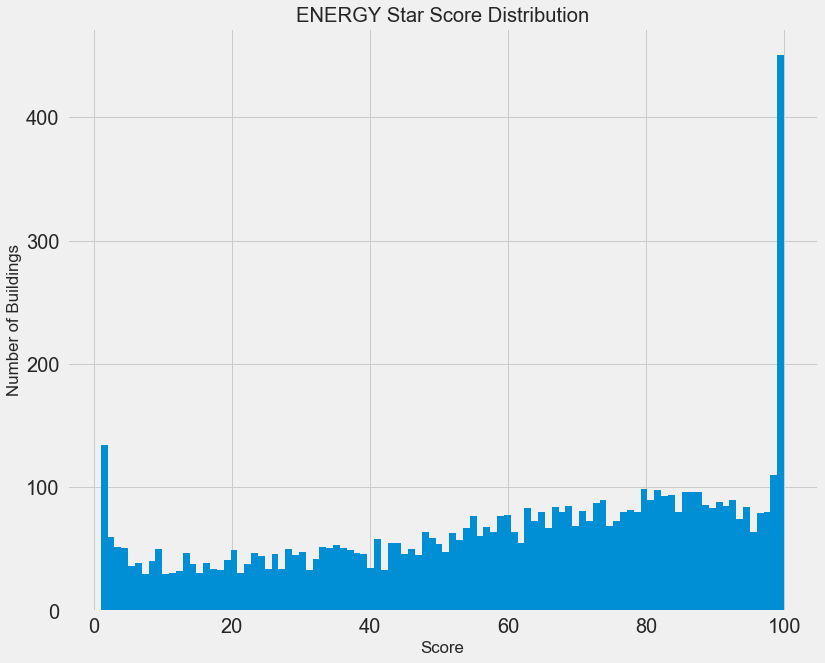

In [33]:
# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(train_labels['score'].dropna(), bins = 100);
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('ENERGY Star Score Distribution');

# Machine Learning Models
In this section we will build, train, and evalute several machine learning methods for our supervised regression task. The objective is to determine which model holds the most promise for further development (such as hyperparameter tuning).

We are comparing models using the mean absolute error. A baseline model that guessed the median value of the score was off by an average of 25 points

Imputing Missing Values
Standard machine learning models cannot deal with missing values, and which means we have to find a way to fill these in or disard any features with missing values. Since we already removed features with more than 50% missing values in the first part, here we will focus on filling in these missing values, a process known as imputation). There are a number of methods for imputation but here we will use the relatively simple method of replacing missing values with the median of the column. (Here is a more thorough discussion on imputing missing values)

In [34]:
# Create an imputer object with a median filling strategy
imputer = Imputer(strategy='mean')

# Train on the training features
imputer.fit(train_features)

# Transform both training data and testing data
X = imputer.transform(train_features)
X_test = imputer.transform(test_features)

In [35]:
print('Missing values in training features: ', np.sum(np.isnan(X)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

Missing values in training features:  0
Missing values in testing features:   0


In [36]:
# Make sure all values are finite
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


# Scaling

There are two ways to scale features:

For each value, subtract the mean of the feature and divide by the standard deviation of the feature. This is known as standardization and results in each feature having a mean of 0 and a standard deviation of 1.

For each value, subtract the minimum value of the feature and divide by the maximum minus the minimum for the feature (the range). This assures that all the values for a feature are between 0 and 1 and is called scaling to a range or normalization.

In [37]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)

# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [38]:

# Convert y to one-dimensional array (vector)
y = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

# Models Pipeline
Performance Comparison of machine learning models using the great Scikit-Learn library:

1.Linear Regression

2.Support Vector Machine Regression

3.Random Forest Regression

4.Gradient Boosting Regression

In [39]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    model.fit(X, y)
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    # Return the performance metric
    return model_mae

In [40]:
def model_pipeline(Model):
    if Model=='Linear Regression':
        lr = LinearRegression()
        lr_mae = fit_and_evaluate(lr)
        print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)
    elif Model=='SVR':
        svm = SVR(C = 1000, gamma = 0.1)
        svm_mae = fit_and_evaluate(svm)
        print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)
    elif Model=='Random Forest':
        random_forest = RandomForestRegressor(random_state=60)
        random_forest_mae = fit_and_evaluate(random_forest)
        print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)
    elif Model=='GBM':
        gradient_boosted = GradientBoostingRegressor(random_state=60)
        gradient_boosted_mae = fit_and_evaluate(gradient_boosted)
        print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

In [41]:
model_pipeline('Linear Regression')
model_pipeline('SVR')
model_pipeline('Random Forest')
model_pipeline('GBM')

Linear Regression Performance on the test set: MAE = 13.5389
Support Vector Machine Regression Performance on the test set: MAE = 11.1242
Random Forest Regression Performance on the test set: MAE = 9.9320
Gradient Boosted Regression Performance on the test set: MAE = 10.1069


# Model Optimization-HyperParameter Tuning


Tuning the model hyperparameters controls the balance of under vs over fitting in a model. We can try to correct for under-fitting by making a more complex model, such as using more trees in a random forest or more layers in a deep neural network. A model that underfits has high bias, and occurs when our model does not have enough capacity (degrees of freedom) to learn the relationship between the features and the target. We can try to correct for overfitting by limiting the complexity of the model and applying regularization.

#Hyperparameters with random search & cross validation
We can choose the best hyperparameters for a model through random search and cross validation.

Here we will implement random search with cross validation to select the optimal hyperparameters for the gradient boosting regressor. We first define a grid then peform an iterative process of: randomly sample a set of hyperparameters from the grid, evaluate the hyperparameters using 4-fold cross-validation, and then select the hyperparameters with the best performance.

Of course we don't actually do this iteration ourselves, we let Scikit-Learn and RandomizedSearchCV do the process for us!

In [42]:

loss = ['ls', 'lad', 'huber']
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
min_samples_leaf = [1, 2, 4, 6, 8]
min_samples_split = [2, 4, 6, 10]
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

estimator: the model

param_distributions: the distribution of parameters we defined

cv the number of folds to use for k-fold cross validation

n_iter: the number of different combinations to try

scoring: which metric to use when evaluating candidates

n_jobs: number of cores to run in parallel (-1 will use all available)

verbose: how much information to display (1 displays a limited amount)

return_train_score: return the training score for each cross-validation fold

random_state: fixes the random number generator used so we get the same results every run The Randomized Search Object is trained the same way as any other scikit-learn model. After training, we can compare all the different hyperparameter combinations and find the best performing one.

In [43]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [44]:
# Fit on the training data
random_cv.fit(X, y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 16.6min finished


RandomizedSearchCV(cv=4, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=25, n_jobs=-1,
          param_distributions={'loss': ['ls', 'lad', 'huber'], 'n_estimators': [100, 500, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 10], 'max_features': ['auto', 'sqrt', 'log2', None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=1)

In [45]:
# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_loss,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
12,23.935522,0.057420,-9.115356,-7.064091,lad,5,None,6,6,500,...,-8.843979,-7.258925,-9.507532,-6.896980,-9.079893,-6.901472,0.589968,0.022434,0.242862,0.166229
3,24.186854,0.041977,-9.162475,-4.790462,huber,5,None,8,6,500,...,-8.939484,-4.656990,-9.511406,-5.109021,-9.184044,-4.692890,0.546052,0.002234,0.220011,0.184712
9,14.325117,0.027305,-9.317542,-7.147087,huber,3,auto,2,4,500,...,-9.007958,-7.256732,-9.636700,-6.972657,-9.298048,-7.134357,0.190931,0.003160,0.222589,0.110248
0,4.397065,0.012271,-9.323697,-7.480472,ls,5,auto,6,2,100,...,-9.086409,-7.506691,-9.607527,-7.386208,-9.367566,-7.512782,0.178778,0.003878,0.191653,0.054530
10,128.768202,0.246890,-9.408902,-0.485310,huber,10,None,6,10,1100,...,-9.156591,-0.548208,-9.670879,-0.471633,-9.577873,-0.431296,4.125961,0.084181,0.219466,0.042082
21,7.996014,0.044521,-9.449705,-6.112769,huber,5,log2,4,6,500,...,-9.096412,-6.170485,-9.866554,-5.994136,-9.337301,-6.116906,0.598432,0.008851,0.280000,0.071843
2,69.900423,0.096694,-9.466840,-0.253998,huber,10,auto,2,4,500,...,-9.233078,-0.266320,-9.618174,-0.246492,-9.501710,-0.198973,2.531091,0.007009,0.142342,0.037938
7,10.167254,0.030734,-9.478289,-7.259540,ls,3,auto,6,4,500,...,-9.219507,-7.385600,-9.857852,-7.047246,-9.483150,-7.295989,0.661478,0.005445,0.238101,0.127247
13,19.201399,0.122017,-9.508526,-6.494964,lad,5,sqrt,1,10,1500,...,-9.063387,-6.679459,-9.908260,-6.332426,-9.556955,-6.433001,1.246414,0.021906,0.300125,0.128352
4,39.079135,0.181845,-9.529678,-2.715089,lad,15,sqrt,6,6,900,...,-9.273431,-2.759744,-9.837733,-2.663021,-9.584075,-2.723586,0.848975,0.001610,0.209013,0.034563


In [46]:
random_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [47]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = GradientBoostingRegressor(loss = 'lad', max_depth = 5,
                                  min_samples_leaf = 6,
                                  min_samples_split = 6,
                                  max_features = None,
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [48]:
# Fit the grid search
grid_search.fit(X, y)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  6.0min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

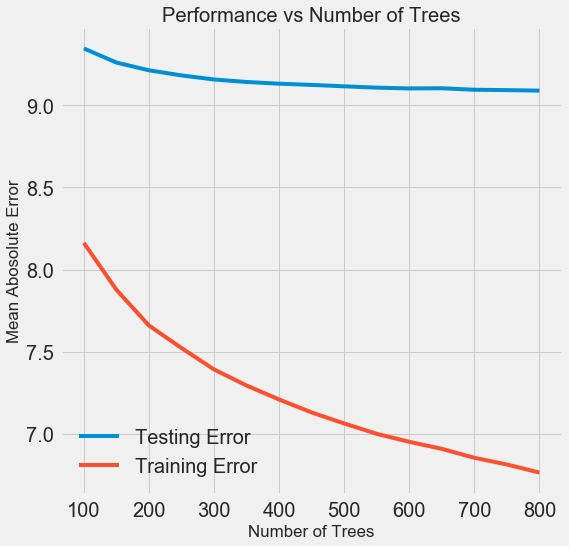

In [49]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [50]:

results.sort_values('mean_test_score', ascending = False).head(5)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
14,42.880523,0.054735,-9.089096,-6.765360,800,{'n_estimators': 800},1,-8.980512,-6.965424,-8.789749,-6.988978,-9.522751,-6.486161,-9.063619,-6.620878,0.713244,0.009539,0.269295,0.217289
13,35.500954,0.056984,-9.092155,-6.814829,750,{'n_estimators': 750},2,-8.991395,-6.999134,-8.791514,-7.042039,-9.521326,-6.514876,-9.064629,-6.703269,0.678181,0.001732,0.267141,0.216801
12,36.140151,0.056350,-9.094450,-6.855303,700,{'n_estimators': 700},3,-9.003534,-7.042554,-8.794715,-7.082437,-9.513526,-6.569997,-9.066261,-6.726225,0.609587,0.007053,0.261965,0.214891
10,30.812761,0.080973,-9.102497,-6.952582,600,{'n_estimators': 600},4,-9.009172,-7.086141,-8.828322,-7.180653,-9.501556,-6.751874,-9.071162,-6.791660,0.586606,0.004359,0.247026,0.184414
11,32.253904,0.051985,-9.103532,-6.909891,650,{'n_estimators': 650},5,-9.009637,-7.062623,-8.820063,-7.140764,-9.518716,-6.668056,-9.065942,-6.768121,0.525919,0.002829,0.256387,0.196985


From this plot, it's pretty clear that our model is overfitting! The training error is significantly lower than the testing error, which shows that the model is learning the training data very well but then is not able to generalize to the test data as well. Moveover, as the number of trees increases, the amount of overfitting increases. Both the test and training error decrease as the number of trees increase but the training error decreases more rapidly.

Based on the cross validation results, the best model using 800 trees and achieves a cross validation error under 9. This indicates that the average cross-validation estimate of the Energy Star Score is within 9 points of the true answer!

# Final model on the test set
We will use the best model from hyperparameter tuning to make predictions on the testing set. Remember, our model has never seen the test set before, so this performance should be a good indicator of how the model would perform if deployed in the real world.

For comparison, we can also look at the performance of the default model. The code below creates the final model, trains it (with timing), and evaluates on the test set.

In [51]:
# Select the best model
final_model = grid_search.best_estimator_
final_model

final_pred = final_model.predict(X_test)
#print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

Final model performance on the test set:   MAE = 9.0904.


The final model does out-perform the baseline model by about 10%, but at the cost of significantly increased running time (it's about 12 times slower on my machine). Machine learning is often a field of tradeoffs: bias vs variance, acccuracy vs interpretability, accuracy vs running time, and the final decision of which model to use depends on the situation. Here, the increase in run time is not an impediment, because while the relative difference is large, the absolute magnitude of the training time is not significant. In a different situation, the balance might not be the same so we would need to consider what we are optimizing for and the limitations we have to work with.

To get a sense of the predictions, we can plot the distribution of true values on the test set and the predicted values on the test set.

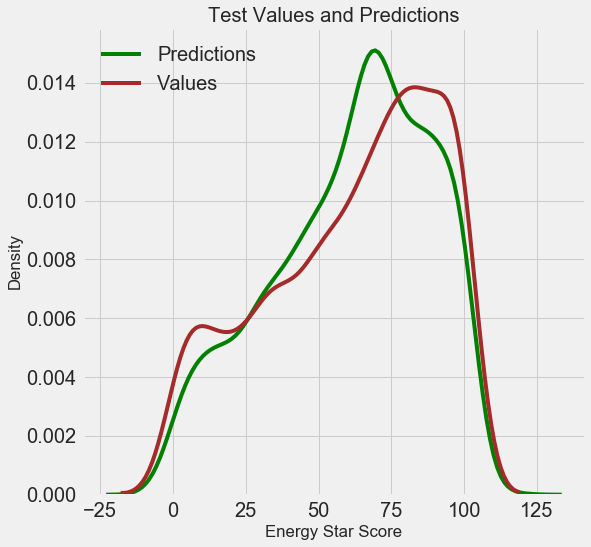

In [52]:
figsize(8, 8)

# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions',color='green')
sns.kdeplot(y_test, label = 'Values',color='brown')

# Label the plot
plt.xlabel('Energy Star Score'); plt.ylabel('Density');
plt.title('Test Values and Predictions');


The distribution looks to be nearly the same although the density of the predicted values is closer to the median of the test values rather than to the actual peak at 100. It appears the model might be less accurate at predicting the extreme values and instead predicts values closer to the median.

Another diagnostic plot is a histogram of the residuals. Ideally, we would hope that the residuals are normally distributed, meaning that the model is wrong the same amount in both directions (high and low).

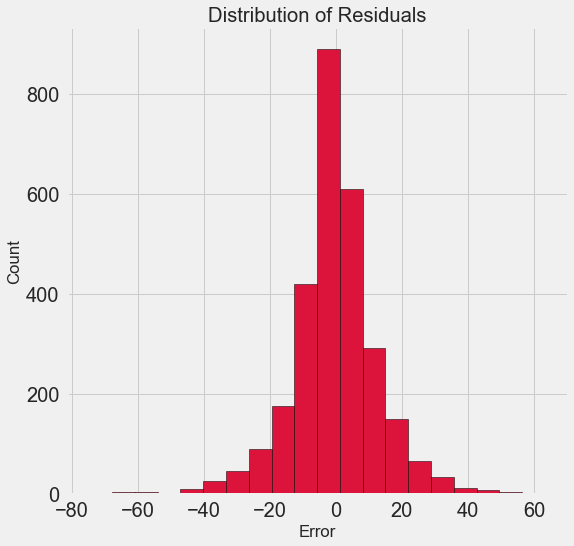

In [53]:
figsize = (6, 6)

# Calculate the residuals 
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'crimson', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

# Conclusion

Evaluating the best model on the testing set

The results showed us that machine learning is applicable to our problem, with the final model able to the predict the Energy Star Score of a building to within 9.1 points. We also saw that hyperparamter tuning was able to improve the performance of the model although at a considerable cost in terms of time invested. This is a good reminder that proper feature engineering and gathering more data (if possible!) has a much larger pay-off than fine-tuning the model. We also observed the trade-off in run-time versus accuracy, which is one of many considerations we have to take into account when designing machine learning models.

We know our model is accurate, but do we know why it makes the predictions it does? The next step in the machine learning process is crucial: trying to understand how the model makes predictions. Achieveing high accuracy is great, but it would also be helpful if we could figure out why the model is able to predict accurately so we could use this information to better understand the problem. For example, what features does the model rely on to infer the Energy Star Score? It is possible to use this model for feature selection and implement a simpler model that is more interpretable?